Build a regression model.

In [34]:
import requests
import os

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the merged dataset
merged_data = pd.read_csv('merged_newyork_bike_yelp_data_outer.csv')

# Select relevant columns and drop missing values
data = merged_data[['Distance (m)', 'Rating']].dropna()

# Split the data into features (X) and target (y)
X = data[['Distance (m)']]  # Independent variable: Distance
y = data['Rating']          # Dependent variable: Yelp rating

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model coefficients
print(f"Model Coefficients: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

from sklearn.metrics import mean_squared_error, r2_score

# Predict ratings for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")



Model Coefficients: 0.0003
Intercept: 4.2261

Model Performance:
Mean Squared Error (MSE): 0.0440
R-squared (R²): 0.1045


Provide model output and an interpretation of the results. 

Negative Correlation: The farther a POI is from a bike station, the slightly lower its average Yelp rating tends to be.


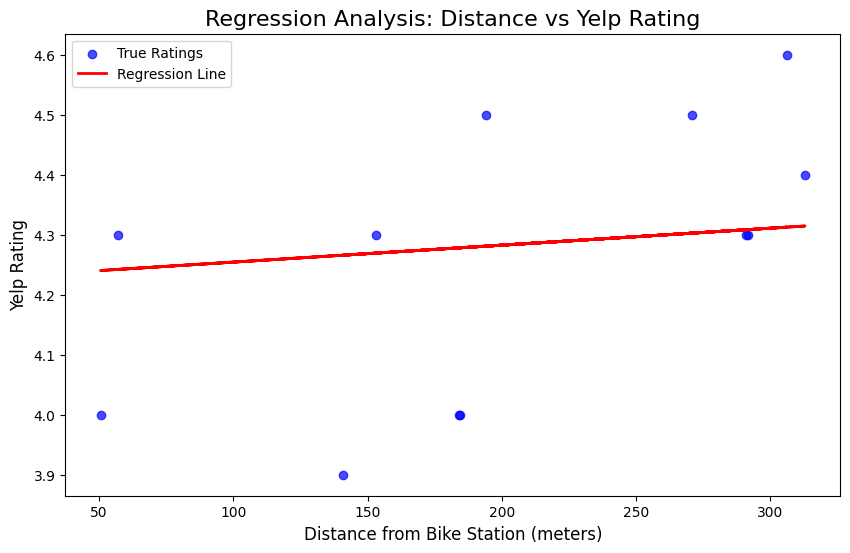

In [36]:
import matplotlib.pyplot as plt

# Scatter plot of true vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.7, label='True Ratings')  # Actual ratings
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')  # Regression line
plt.title('Regression Analysis: Distance vs Yelp Rating', fontsize=16)
plt.xlabel('Distance from Bike Station (meters)', fontsize=12)
plt.ylabel('Yelp Rating', fontsize=12)
plt.legend()
plt.show()


# Stretch

How can you turn the regression model into a classification model?